# Healthcare.
Course-end Project 2

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

## Variables	Description
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: Two hour serum insulin
- BMI: Body Mass Index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age in years
- Outcome: Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
## Project Task: Week 1
- Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 
## Project Task: Week 2
- Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## Project Task: Week 3
- Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

## Project Task: Week 4
- Data Modeling:
1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.
- Data Reporting:
2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
- a. Pie chart to describe the diabetic or non-diabetic population
- b. Scatter charts between relevant variables to analyze the relationships
- c. Histogram or frequency charts to analyze the distribution of the data
- d. Heatmap of correlation analysis among the relevant variables
- e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# Importe the necessary libraries

In [125]:
!pip install -r requirements.txt

In [225]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.simplefilter(action = "ignore")

In [127]:
# Configs
DATA_PATH='./dataset/'
IMG_PATH='./plots/'
PKL_PATH='./pkl/'
CSV_PATH='./csvs/'
RESOLUTION=200

sns.set()

for path in [DATA_PATH,IMG_PATH,PKL_PATH,CSV_PATH]:
    if not os.path.exists(path):
        os.makedirs(path)
        
def save_plots(fig_name):
    plt.savefig(IMG_PATH+fig_name,dpi=RESOLUTION)

In [128]:
input0=pd.read_csv(f'{DATA_PATH}diabetes.csv')

In [129]:
input0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
input0.shape

(768, 9)

# Data Exploration

## Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [131]:
input0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
input0.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [133]:
# Checking null values
input0.isna().sum()/input0.shape[0]*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [134]:
# Lets converte the 0 value for the below colum to nan

null_contain_columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
input0[null_contain_columns]=input0[null_contain_columns].replace({0:np.nan})

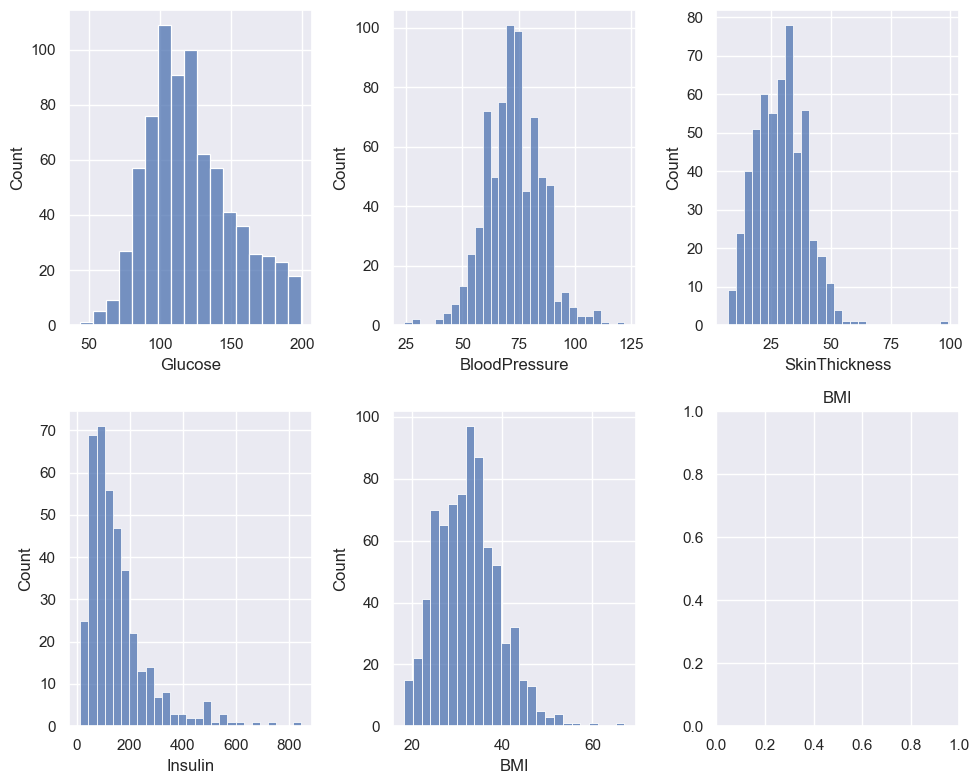

In [135]:
fig,ax=plt.subplots(2,3,figsize=(10,8))

for ax,col in zip(ax.flatten(),null_contain_columns):
    plt.title(col)
    sns.histplot(input0[col],ax=ax)
plt.tight_layout()
save_plots('Null Histogram')
plt.show()

In [136]:
# Check the null value again
input0.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Visually explore these variables using histograms. Treat the missing values accordingly.

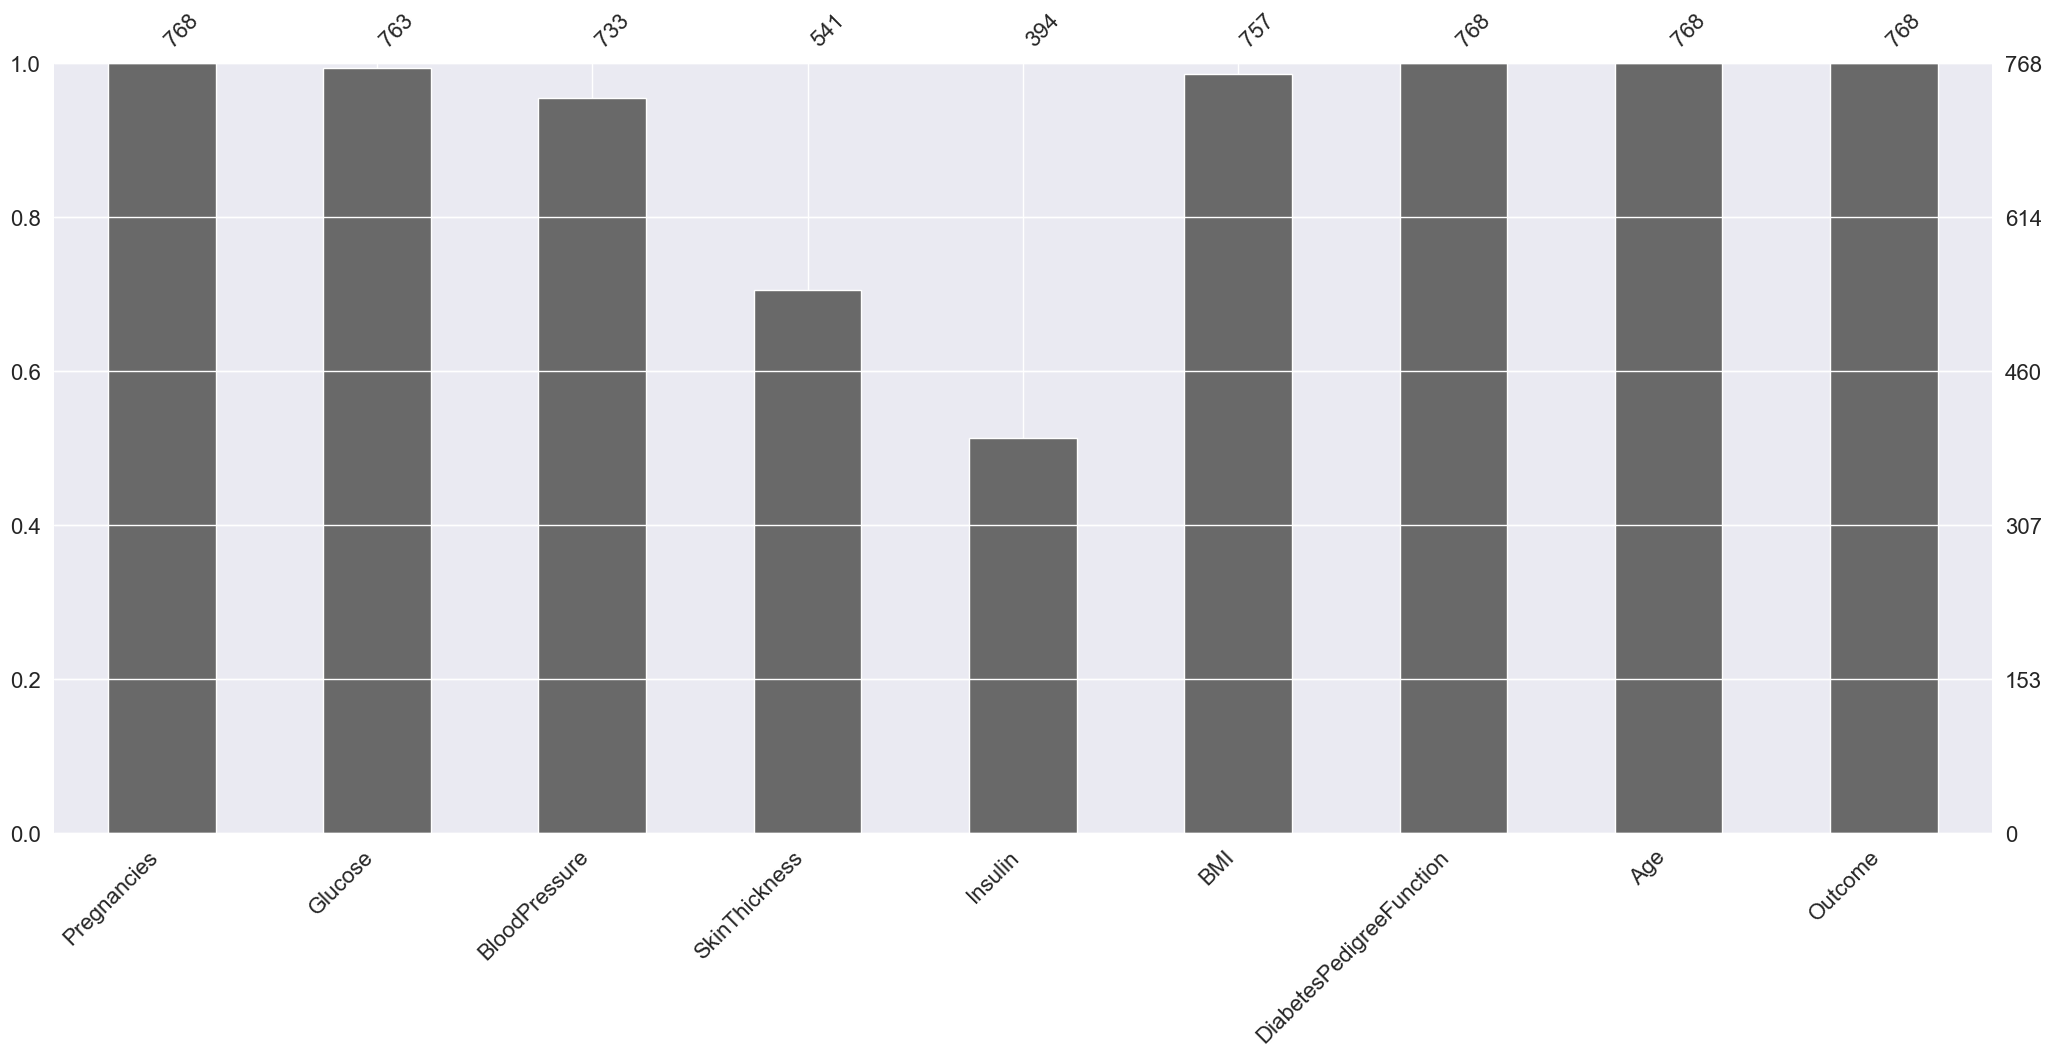

In [137]:
# Visualize the counts of null values
msno.bar(input0)
save_plots('Error chart')
plt.show()

In [138]:
# The missing values will be filled with the median values of each variable.
def median_target(var):   
    temp = input0[input0[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [139]:
def impute_nan(df):
    # The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
    columns = df.columns
    columns = columns.drop("Outcome")
    for i in columns:
        median_target(i)
        df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
        df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [140]:
impute_nan(input0)

In [141]:
input0.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [142]:
input1=input0.copy()

In [143]:
input1.to_csv(f'{CSV_PATH}input1.csv')

## There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [144]:
dtypes_=input1.dtypes.reset_index(name='dtypes')
dtypes_['dtypes']=dtypes_['dtypes'].astype('string')

In [145]:
dtypes_

,index,dtypes
0,Pregnancies,int64
1,Glucose,float64
2,BloodPressure,float64
3,SkinThickness,float64
4,Insulin,float64
5,BMI,float64
6,DiabetesPedigreeFunction,float64
7,Age,int64
8,Outcome,int64


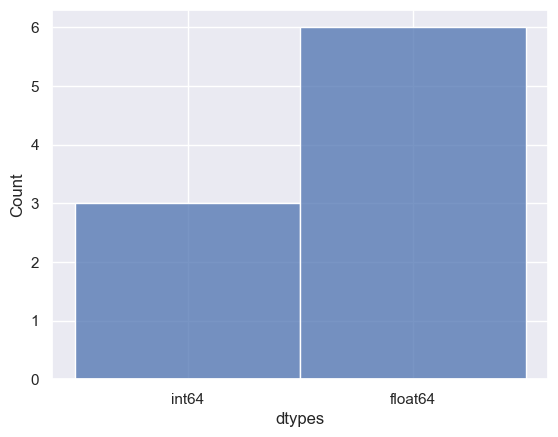

In [146]:
sns.histplot(dtypes_['dtypes'])
save_plots('DatatypesCount')
plt.show()

## Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [147]:
input1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

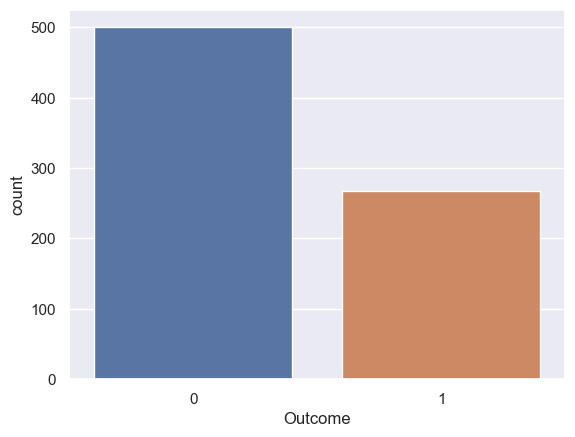

In [148]:
sns.countplot(x=input1['Outcome'])
save_plots('Outcome count')
plt.show()

### Findings
From the above graph I found that the outcome of 0 means not having diabetes is more that the outcome of 1 means having diabetes

## Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

### Features that are related to Pregnancies

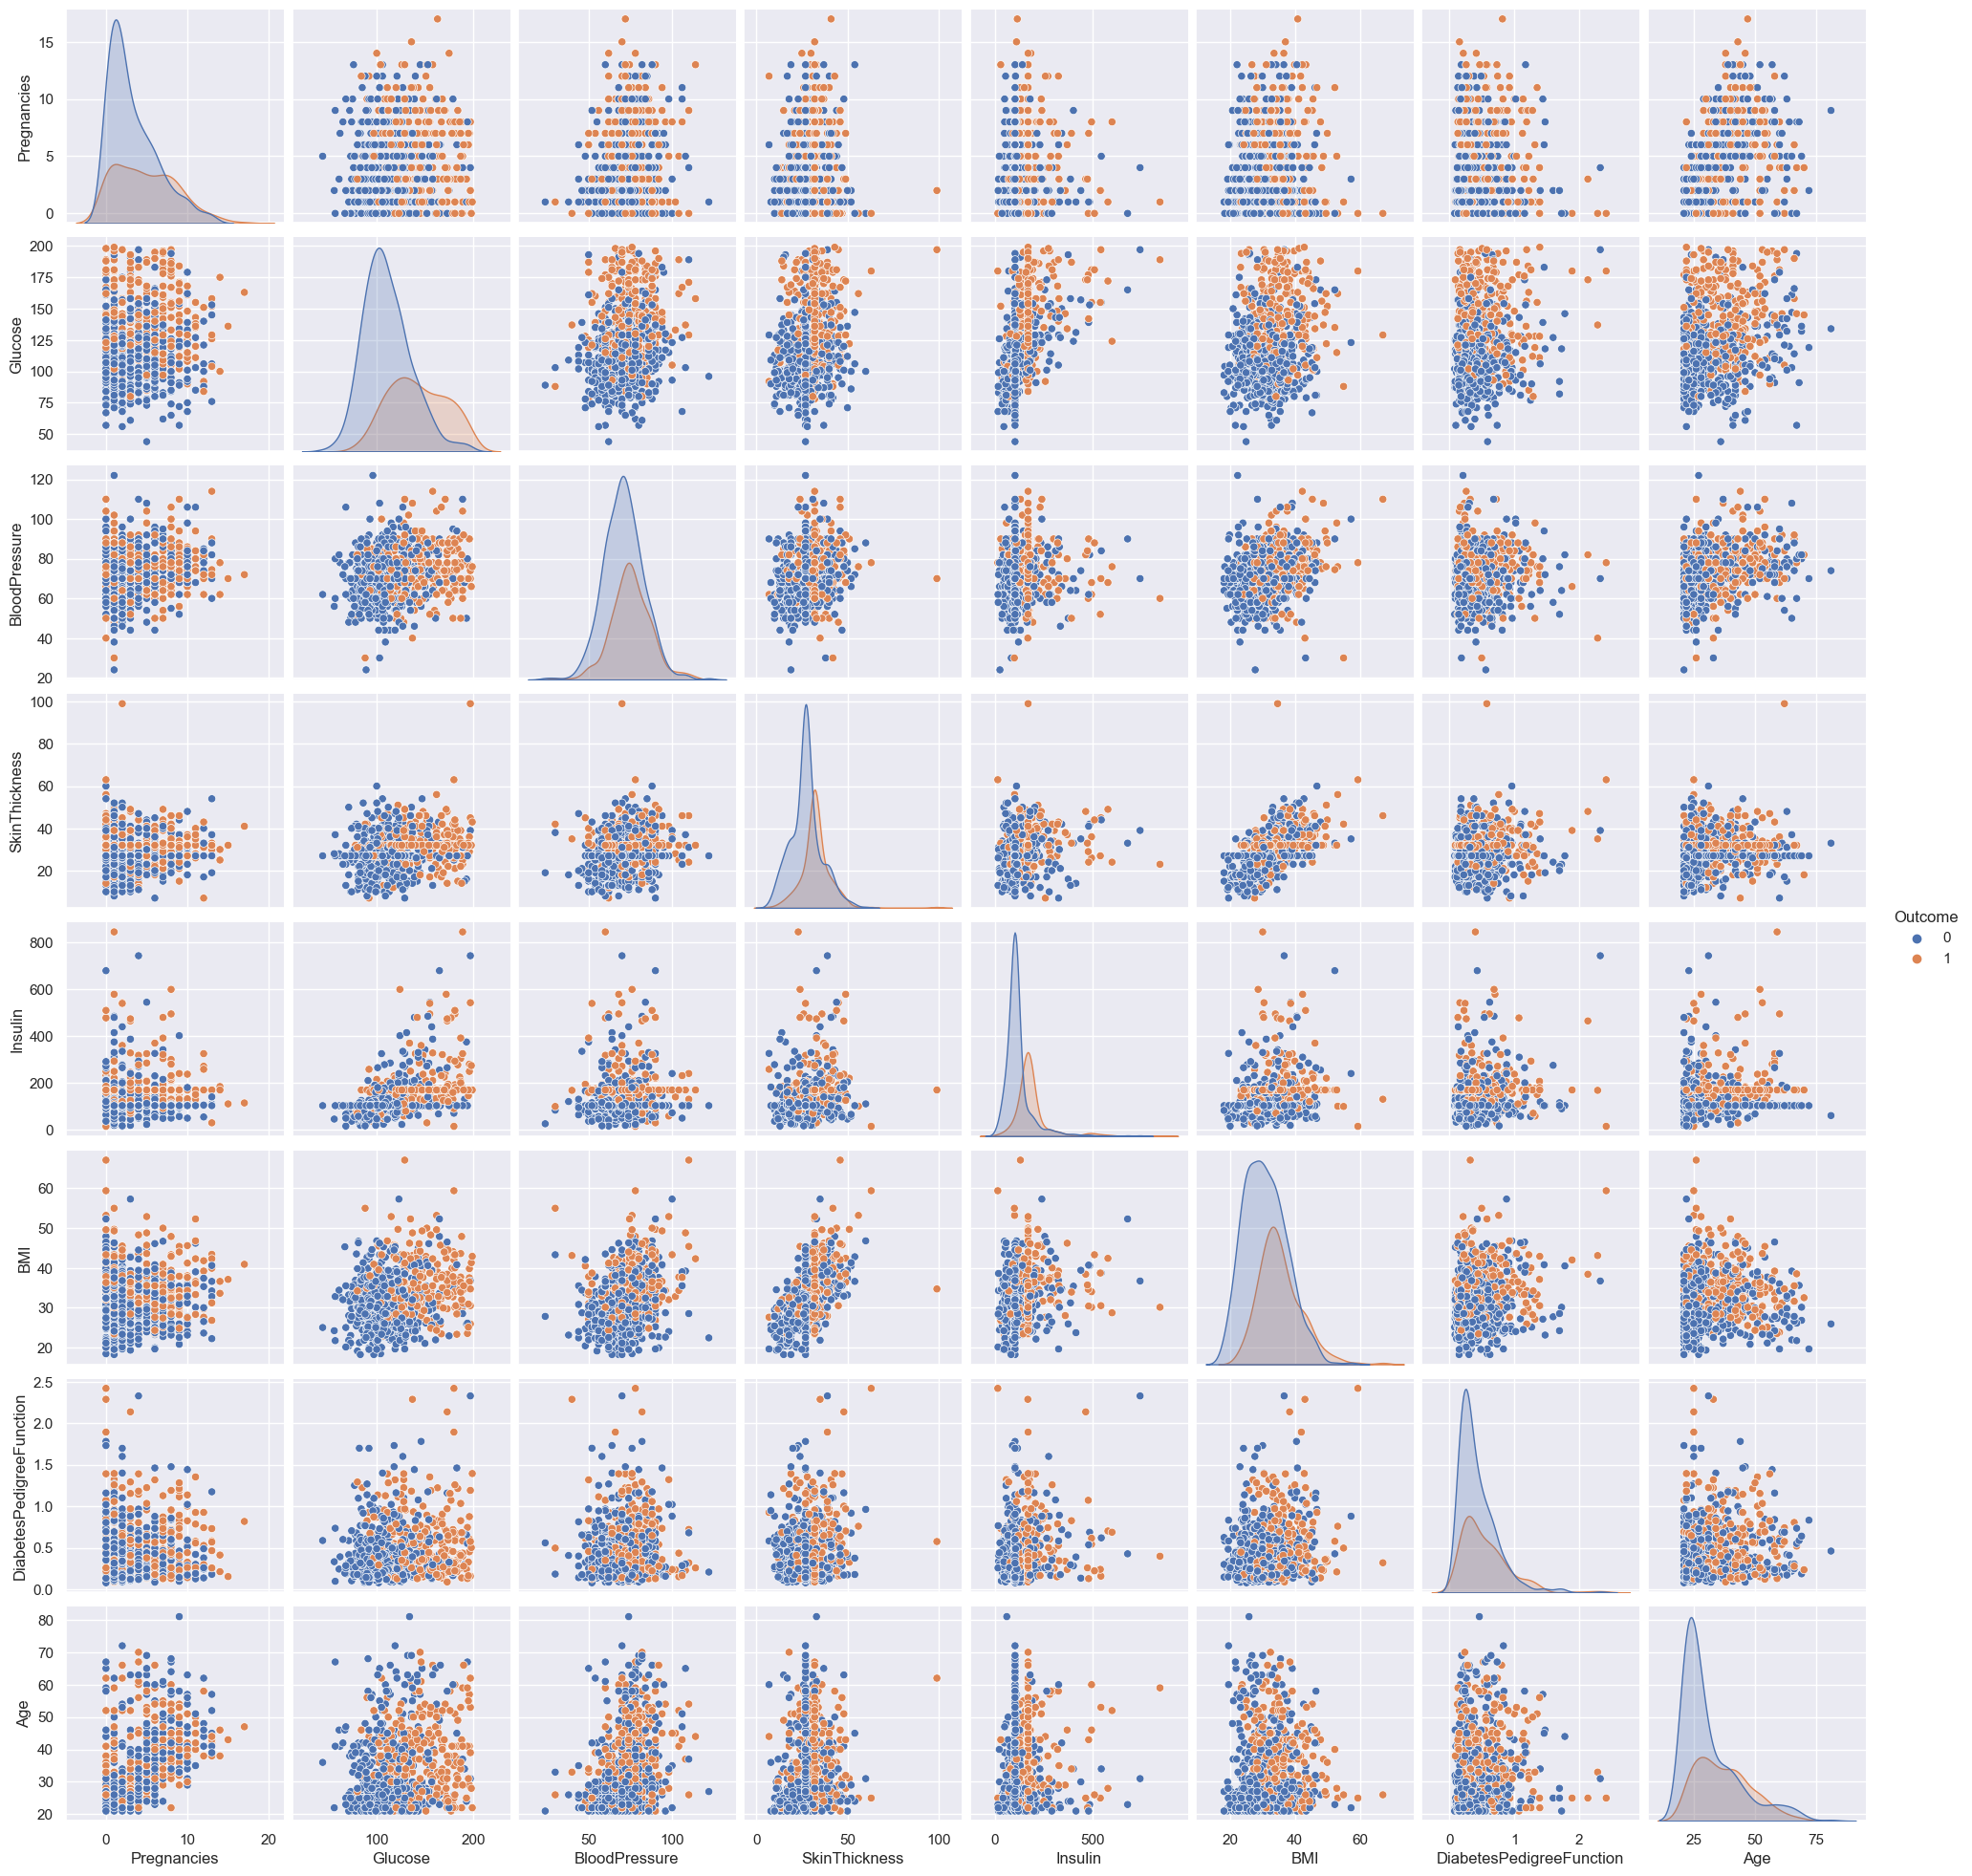

In [149]:
sns.pairplot(data=input1,hue='Outcome')
save_plots('Pairplot for features')
plt.show()

In [150]:
picked_features=[
    ['Pregnancies','Age'],
    ['Glucose','Insulin'],
    ['Glucose','Age'],
    ['Glucose','BMI'],
    ['BloodPressure','Age'],
    ['SkinThickness','BMI'],
    ['SkinThickness','Insulin'],
    ['DiabetesPedigreeFunction','Insulin']
]

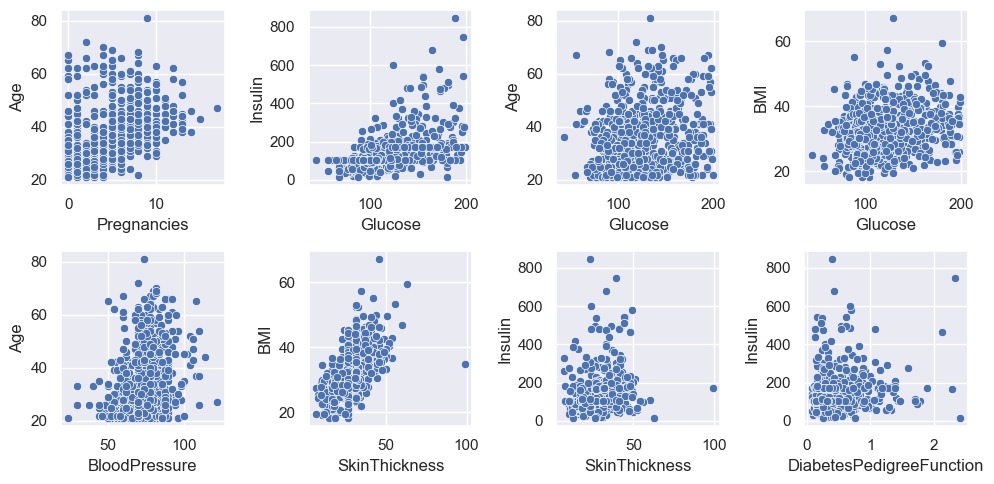

In [151]:
fig,ax=plt.subplots(2,4,figsize=(10,5))

for ax,col in zip(ax.flatten(),picked_features):
    sns.scatterplot(data=input1,x=col[0],y=col[1],ax=ax)
plt.tight_layout()
save_plots('Scatter plot features')
plt.show()

## Perform correlation analysis. Visually explore it using a heat map.

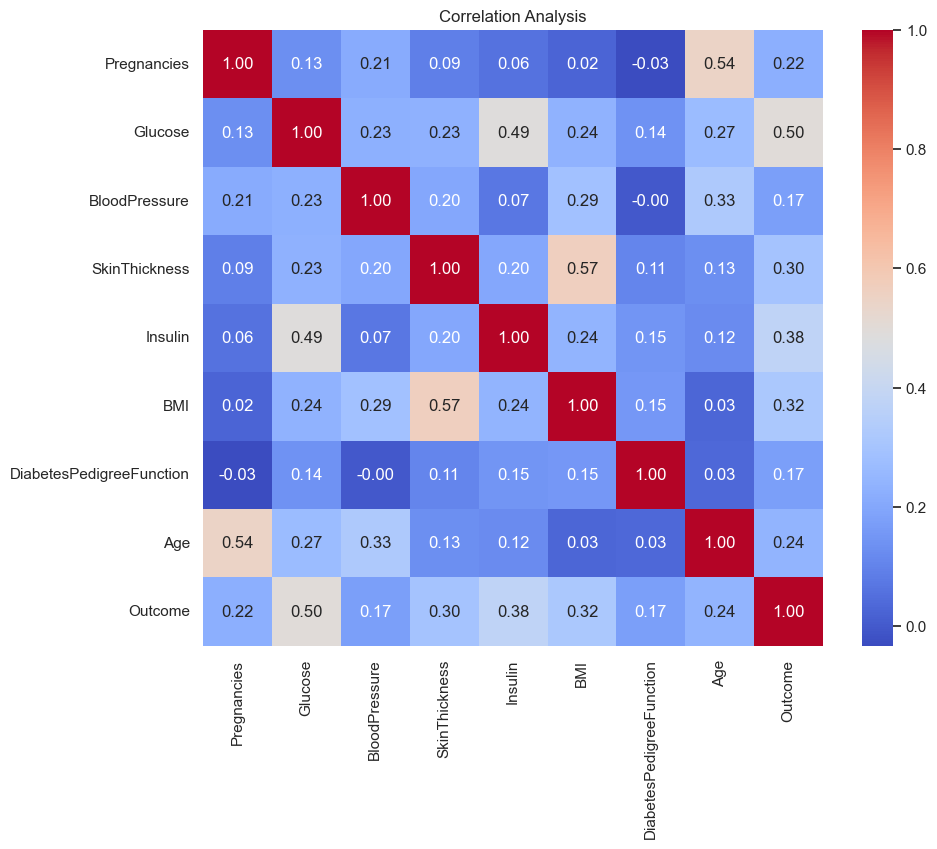

In [152]:
# Calculate correlation matrix
corr=input1.corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Analysis')
save_plots('Heatmap')
plt.show()

### Finding 
- From the heatmap we see that there is a high correlation between the outcome and **Glucose**,**Pregnancies**,**BMI**,**Age**,**Insulin** .We can select this features for modeling.

## Outlier treatment

In [153]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
def outlier_checker(df):
    for feature in df:

        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1- 1.5*IQR
        upper = Q3 + 1.5*IQR
    
        if df[(df[feature] > upper)].any(axis=None):
            print(feature,"yes")
        else:
            print(feature, "no")

In [154]:
outlier_checker(input1)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [155]:
# We determine outliers between all variables with the LOF method
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(input1)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [156]:
input1.shape

(768, 9)

In [157]:
df_scores = lof.negative_outlier_factor_
print(np.sort(df_scores)[0:30])

#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
print(threshold)

[-3.30445978 -3.05893469 -2.48884101 -2.37289269 -2.15297995 -2.09708735
 -2.0772561  -2.01096252 -1.95255968 -1.86384019 -1.74003158 -1.72703492
 -1.71674689 -1.70343883 -1.6688722  -1.64296768 -1.64190437 -1.61620872
 -1.61369917 -1.60057603 -1.5988774  -1.59608032 -1.57027568 -1.55876022
 -1.55674614 -1.51852389 -1.50843907 -1.50280943 -1.50160698 -1.49696405]
-2.0109625157063844


In [158]:
#We delete those that are higher than the threshold
try:
    outlier = df_scores > threshold
    input1 = input1[outlier]
except Exception:
    print(Exception.with_traceback)

In [159]:
input1.to_csv(CSV_PATH+'input1.csv')

## Data Modeling:
### Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

## Feature Engineering

In [160]:
input2=input1.copy()

In [161]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
input1["NewBMI"] = NewBMI
input2.loc[input2["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
input2.loc[(input2["BMI"] > 18.5) & (input2["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
input2.loc[(input2["BMI"] > 24.9) & (input2["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
input2.loc[(input2["BMI"] > 29.9) & (input2["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
input2.loc[(input2["BMI"] > 34.9) & (input2["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
input2.loc[input2["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [162]:
input2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [163]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [164]:
# The operation performed was added to the dataframe.
input2 = input2.assign(NewInsulinScore=input2.apply(set_insulin, axis=1))

In [165]:
input2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [166]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
input2["NewGlucose"] = NewGlucose
input2.loc[input2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
input2.loc[(input2["Glucose"] > 70) & (input2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
input2.loc[(input2["Glucose"] > 99) & (input2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
input2.loc[input2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [167]:
input2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [168]:
# Perform one hot encoding
# Categorical variables in the data set should be converted into numerical values. 
# For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

# The reason why I perform One Hot Encoding is beacause,it protected from the Dummy variable trap.
input2 = pd.get_dummies(input2, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [169]:
input2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [170]:
input2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [171]:
categorical_df=input2[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [172]:
input2.drop(categorical_df.columns,axis=1).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.861842,121.318421,72.369737,28.923684,139.673684,32.359605,0.467222,33.151316,0.347368
std,3.370900,30.121076,11.908805,8.453046,80.433436,6.742324,0.318202,11.594351,0.476448
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.242500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.369000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,169.500000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,114.000000,60.000000,600.000000,67.100000,2.288000,72.000000,1.000000


In [173]:
input2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [174]:
input2.to_csv(CSV_PATH+'input2.csv')

In [175]:
X=input2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y=input2[['Outcome']]

In [176]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)

In [177]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.533333,0.528302,0.264103,0.314928,0.248416,0.568627
1,0.058824,0.264516,0.466667,0.415094,0.149573,0.171779,0.123529,0.196078
2,0.470588,0.896774,0.444444,0.471698,0.264103,0.104294,0.268778,0.215686
3,0.058824,0.290323,0.466667,0.301887,0.135043,0.202454,0.040271,0.000000
4,0.000000,0.600000,0.177778,0.528302,0.261538,0.509202,1.000000,0.235294
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.577778,0.773585,0.282051,0.300613,0.042081,0.823529
764,0.117647,0.503226,0.511111,0.377358,0.149573,0.380368,0.118552,0.117647
765,0.294118,0.496774,0.533333,0.301887,0.165812,0.163599,0.075566,0.176471
766,0.058824,0.529032,0.400000,0.471698,0.264103,0.243354,0.122624,0.509804


In [178]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.227167,0.498829,0.537442,0.413654,0.213117,0.289562,0.176119,0.238261
std,0.198288,0.194330,0.132320,0.159491,0.137493,0.137880,0.143983,0.227340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.444444,0.339623,0.149573,0.190184,0.074434,0.058824
50%,0.176471,0.470968,0.533333,0.396226,0.149573,0.282209,0.131674,0.156863
75%,0.352941,0.619355,0.622222,0.471698,0.264103,0.374233,0.248077,0.392157
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
X=pd.concat([X,categorical_df],axis=1)

In [180]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.352941,0.670968,0.533333,0.528302,0.264103,0.314928,0.248416,0.568627,1,0,0,0,0,0,0,0,0,1
1,0.058824,0.264516,0.466667,0.415094,0.149573,0.171779,0.123529,0.196078,0,0,0,1,0,1,0,1,0,0
2,0.470588,0.896774,0.444444,0.471698,0.264103,0.104294,0.268778,0.215686,0,0,0,0,0,0,0,0,0,1
3,0.058824,0.290323,0.466667,0.301887,0.135043,0.202454,0.040271,0.000000,0,0,0,1,0,1,0,1,0,0
4,0.000000,0.600000,0.177778,0.528302,0.261538,0.509202,1.000000,0.235294,0,0,1,0,0,0,0,0,0,1


In [181]:
X.to_csv(CSV_PATH+'features.csv')

In [182]:
y.to_csv(CSV_PATH+'target.csv')

## Base Model

In [183]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))

# evaluate each model in turn


In [184]:
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345,shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.843421 (0.040959)
KNN: 0.839474 (0.034211)
DT: 0.842105 (0.031688)
RF: 0.888158 (0.030717)
SVM: 0.840789 (0.042208)
XGB: 0.882895 (0.025951)


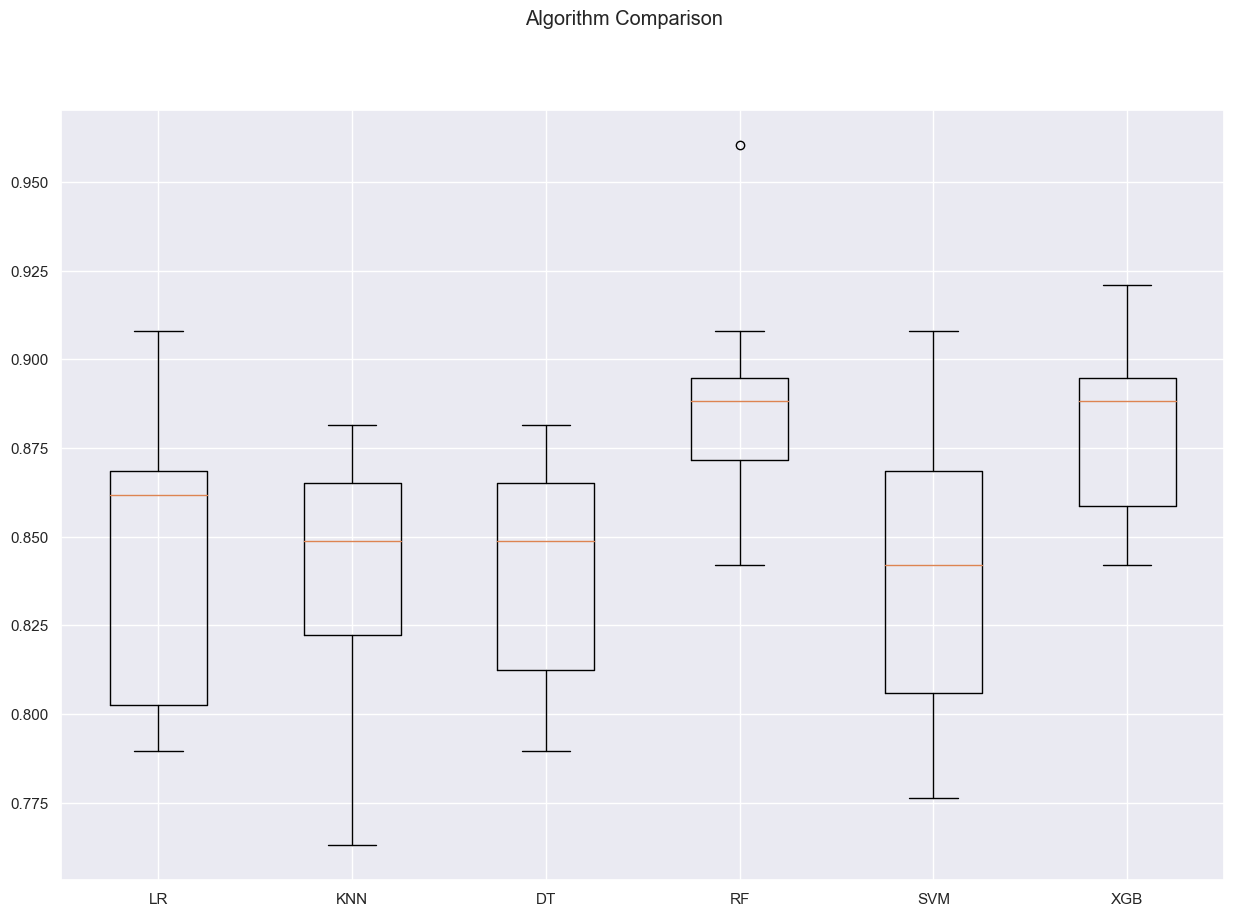

In [185]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
save_plots('Model Comparision')
plt.show()

## Random Forest Model Tuning

In [186]:
# Tuning the random forest
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [187]:
param_grid = {'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance']}

In [188]:
rf_model = RandomForestClassifier(random_state =100)

In [189]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [190]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 200}

### Final Random Forest  Model

In [191]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [192]:
rf_tuned = rf_tuned.fit(X,y)

In [193]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8881578947368421

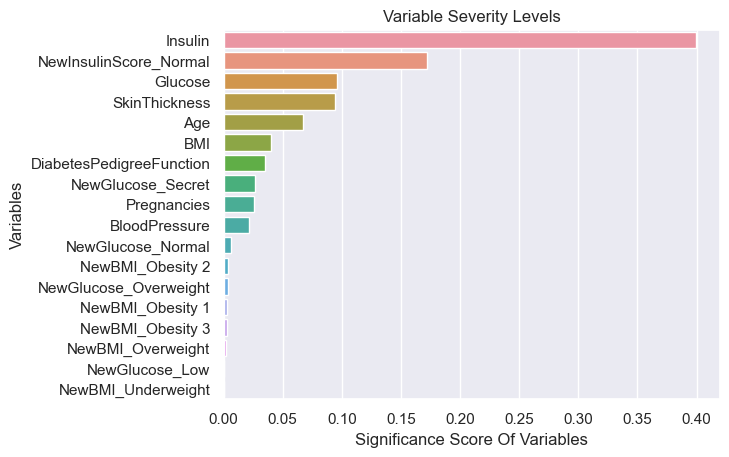

In [194]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
save_plots('Variable Severity Lavels Random Forest')
plt.show()

## XGB Model Tuning

In [195]:
xgb = GradientBoostingClassifier(random_state = 100)

In [196]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [197]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [198]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.18888888888888888,
 'n_estimators': 100,
 'subsample': 1.0}

### Final XGB Model

In [199]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [200]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8986842105263158

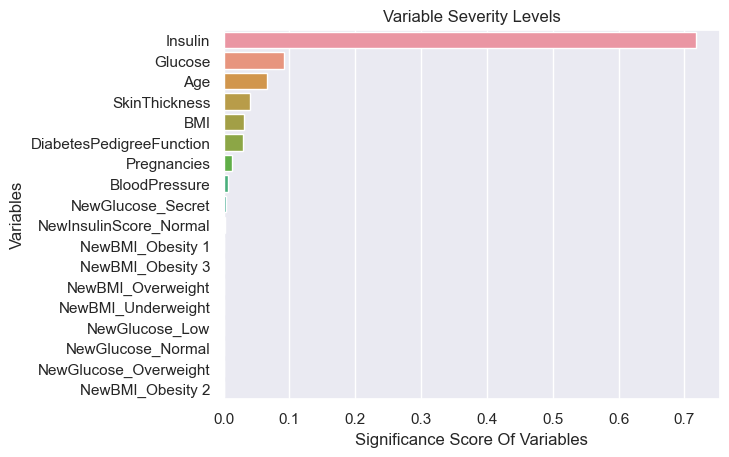

In [201]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
save_plots('Variable Severity Levels XGBoost')
plt.show()

In [202]:
knn_param = {'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance']}

In [203]:
knn_model=KNeighborsClassifier()

In [204]:
knn_cv_model=GridSearchCV(knn_model,
                    knn_param, 
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [205]:
knn_cv_model.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

## Model Comparision

In [206]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 100, max_depth = None, max_features = 7, min_samples_split = 10, n_estimators = 200)))
models.append(('XGB', GradientBoostingClassifier(random_state = 100, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.18888888888888888, n_estimators = 100, subsample = 1.0)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5,weights='distance')))
models.append(('LR',LogisticRegression()))

RF: 0.894737 (0.025649)
XGB: 0.898684 (0.017702)
KNN: 0.848684 (0.031276)
LR: 0.843421 (0.040959)


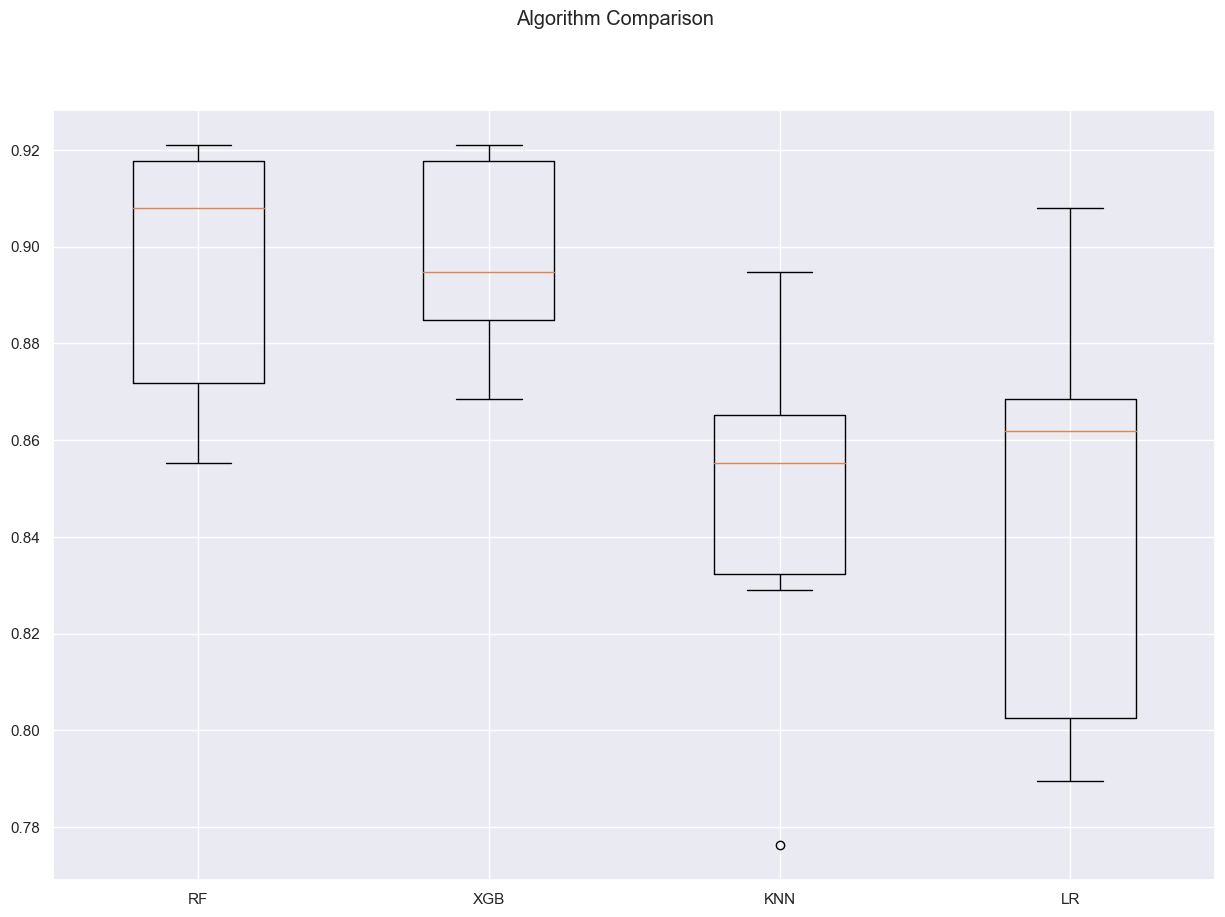

In [223]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 100,shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
save_plots('Algorithm Comparision with validation')
plt.show()

## Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [209]:
# Selecting the KNN model
selected_model=models[2][1].fit(X_train,y_train)

In [227]:
with open (f'{PKL_PATH}knnmodel.pkl','wb') as file:
     pkl.dump(selected_model,file)

In [210]:
y_pred=selected_model.predict(X_test)

In [211]:
sensitivity=confusion_matrix(y_test,y_pred)[1,1]/(confusion_matrix(y_test,y_pred)[1,0]+confusion_matrix(y_test,y_pred)[1,1])
sensitivity

0.7678571428571429

In [212]:
specificity=confusion_matrix(y_test,y_pred)[0,0]/(confusion_matrix(y_test,y_pred)[0,0]+confusion_matrix(y_test,y_pred)[0,1])
specificity

0.90625

In [213]:
y_prob=selected_model.predict_proba(X_test)[:,1]

In [214]:
roc_auc=roc_auc_score(y_test,y_prob)

In [215]:
accuracy=accuracy_score(y_test,y_pred)

In [216]:
print('Sensitivity (recall): ',sensitivity)
print('Specificity: ',specificity)
print('AUC (ROC Curve): ',roc_auc)
print('Accuracy: ',accuracy)

Sensitivity (recall):  0.7678571428571429
Specificity:  0.90625
AUC (ROC Curve):  0.9268973214285714
Accuracy:  0.8552631578947368


In [217]:
report=classification_report(y_test,y_pred)

In [218]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        96
           1       0.83      0.77      0.80        56

    accuracy                           0.86       152
   macro avg       0.85      0.84      0.84       152
weighted avg       0.85      0.86      0.85       152



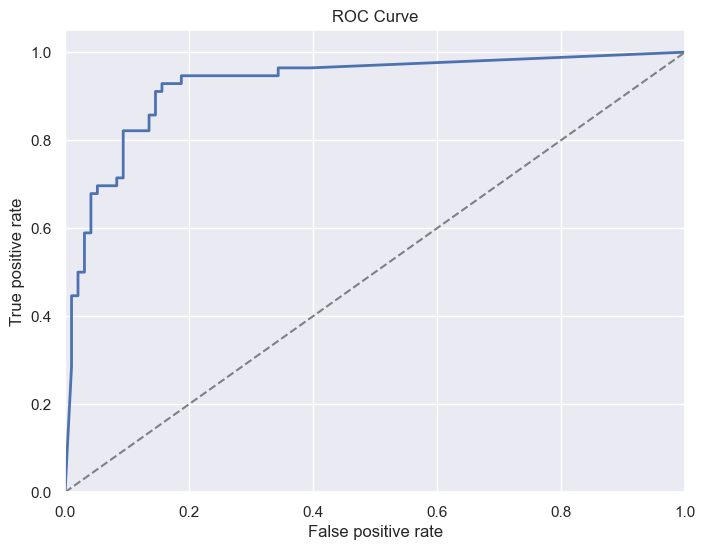

In [219]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='b',lw=2)
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
save_plots('ROC Curve')
plt.show()

# Conclusion
- The KNN model get an accuracy of 84%
- The Random Forest get an accuracy of 89%
- The XG Boost get an accuracy of 89%
- The Logistic Regression get an accuracy of 84%
- Among all the Random Forest and XG Boost are the best model

- The KNN algorithm has an accuracy of 84% and 
    - Sensitivity (recall):  0.6833333333333333
    - Specificity:  0.9347826086956522
    - AUC (ROC Curve):  0.898731884057971
    - Accuracy:  0.8355263157894737

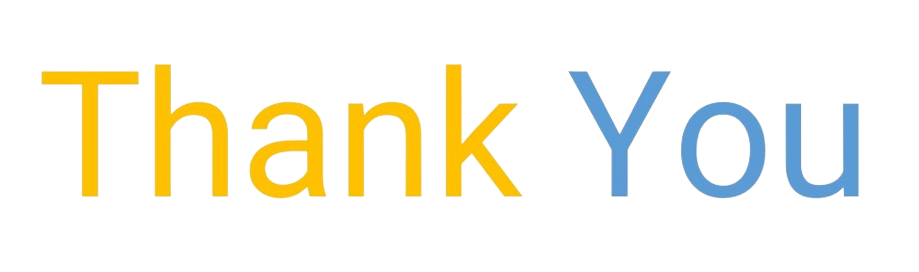